# Credit Card Fraud Detection

In [2]:
# basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# formatting
import warnings
warnings.filterwarnings("ignore")

In [3]:
# check out the data
txns = pd.read_csv('../data/creditcard.csv')
txns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Data Overview

* super unbalaned - `0.17:99.83` (fraud to non-fraud)
* V1-V28 are results of PCA (Principal Component Analysis), hence 0 domain knowledge
* Time is time elapsed btw ith txn and 1st txn

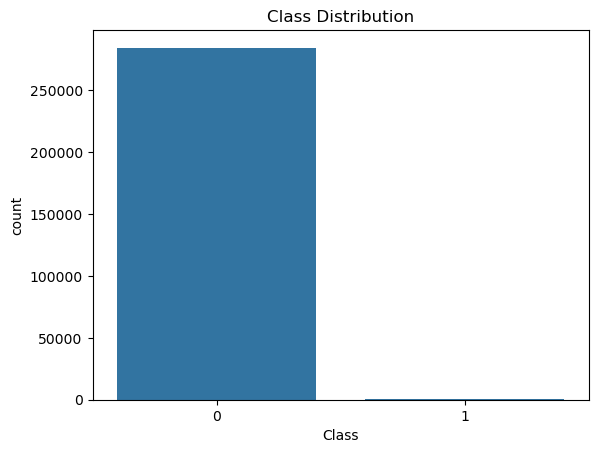

In [4]:
# plot the class distribution
sns.countplot(x='Class', data=txns)
plt.title('Class Distribution')
plt.show()

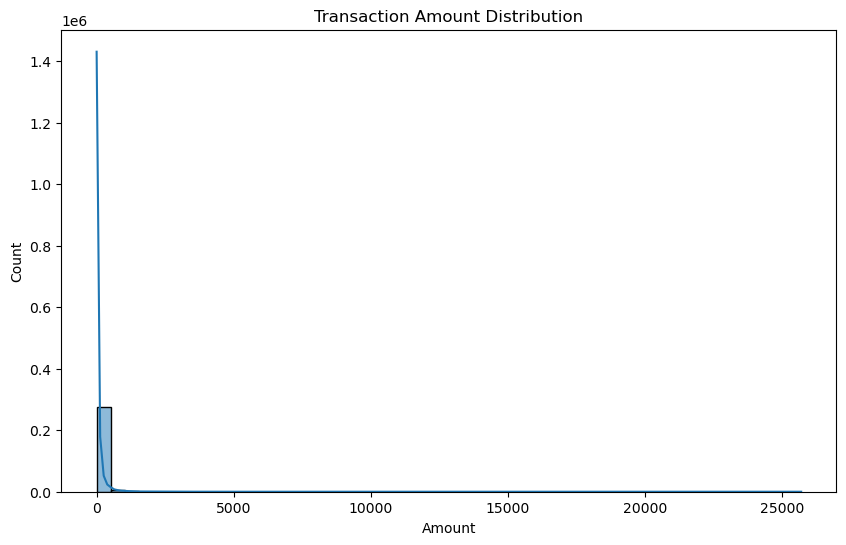

In [5]:
# plot the distribution of Amount 
plt.figure(figsize=(10, 6))
sns.histplot(txns['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

##### majorly cheap values of amount

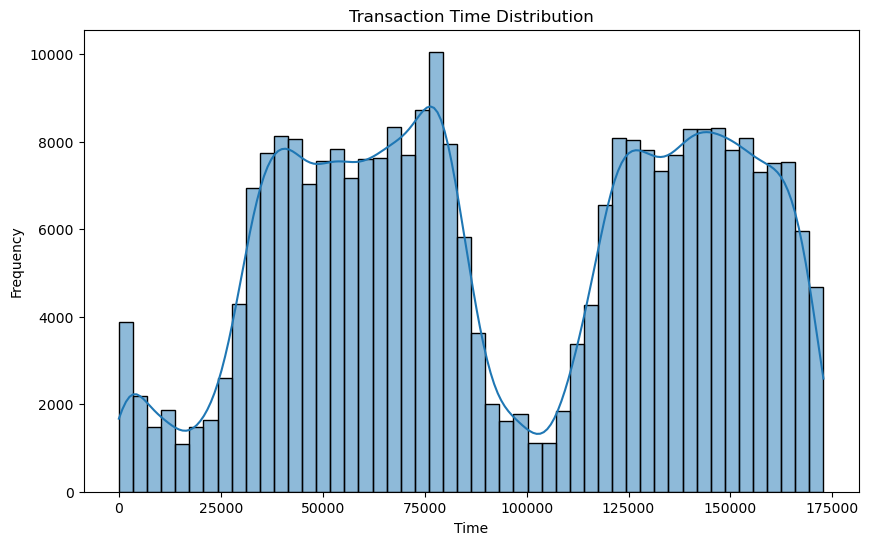

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(txns['Time'], bins=50, kde=True)
plt.title('Transaction Time Distribution')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

## Feature Engineering

only two features are somewhat meaningful. `time` and `amount`.

* `amount`: take log of amount as it's super skewed, should fix the range.
* `time`: convert to hours of the day -> monring, evening, night

### Amount

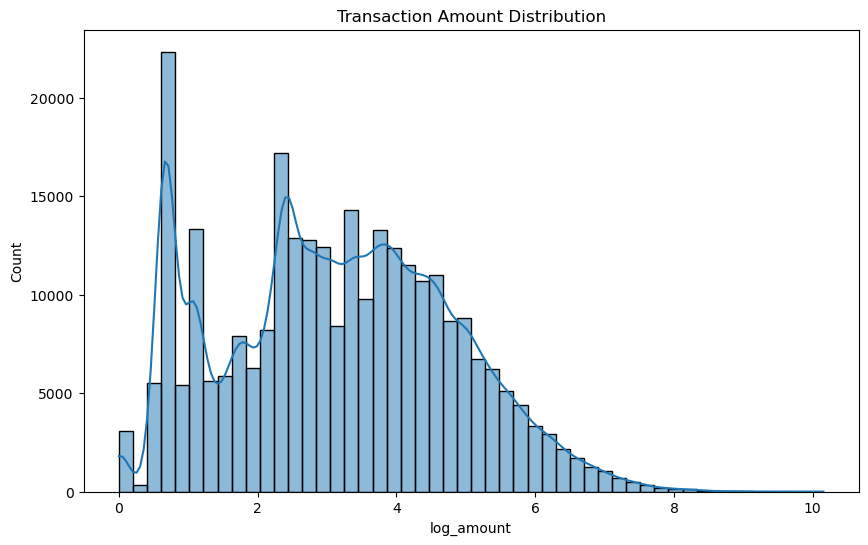

In [7]:
# transform amount and plot it
txns['log_amount'] = np.log1p(txns['Amount'])
plt.figure(figsize=(10, 6))
sns.histplot(txns['log_amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

#### distribution looks a bit better now

In [8]:
# drop original amount column
txns = txns.drop(columns=['Amount'])

In [9]:
txns

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,log_amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.014760
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,1.305626
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.939276
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.824306
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.262539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,0.570980
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,3.249987
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,4.232366
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,2.397895


### Time

In [10]:
txns['Time'].value_counts()

Time
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
127750.0     1
62260.0      1
62259.0      1
127753.0     1
172792.0     1
Name: count, Length: 124592, dtype: int64

In [11]:
# convert seconds elapsed to hour of the day
txns['hour_of_day'] = (txns['Time'] // 3600) % 24
txns['hour_of_day'] = txns['hour_of_day'].astype(int)

# convert time to morning/noon/evening/night and label encode
txns['time_of_day'] = pd.cut(txns['hour_of_day'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Noon', 'Evening'], right=False)
txns['time_of_day'] = txns['time_of_day'].map({'Morning': 0, 'Noon': 1, 'Evening': 2, 'Night': 3 })

In [12]:
# drop original time column
txns = txns.drop(columns=['Time'])
txns.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Class,log_amount,hour_of_day,time_of_day
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.014760,0,3
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,1.305626,0,3
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.939276,0,3
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.824306,0,3
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.262539,0,3


In [13]:
# Split the data into training, validation, and testing sets (60:20:20)
from sklearn.model_selection import train_test_split

X = txns.drop(columns=['Class'])
y = txns['Class']

# First split: 80% train + val, 20% test
X_full, X_test, y_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Second split: split the 80% full into 75-25 (resulting in 60% train, 20% val)
X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, test_size=0.25, random_state=42, stratify=y_full)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Val: {X_val.shape}, {y_val.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (170883, 31), (170883,)
Val: (56962, 31), (56962,)
Test: (56962, 31), (56962,)


### Baseline (LogisticRegression) Model

In [14]:
# train baseline model
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression baseline
base_log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

base_log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1,
                   random_state=42)

In [15]:
# Evaluate baseline model
from sklearn.metrics import (classification_report, 
                             roc_auc_score, 
                             average_precision_score)

y_pred = base_log_reg.predict(X_val)
y_prob = base_log_reg.predict_proba(X_val)[:, 1]

# Metrics
print(f"ROC AUC: {roc_auc_score(y_val, y_prob):.4f}")
print(f"PR AUC: {average_precision_score(y_val, y_prob):.4f}")
print("\nClassification Report:"    )
print(classification_report(y_val, y_pred, digits=4))

ROC AUC: 0.9774
PR AUC: 0.6714

Classification Report:
              precision    recall  f1-score   support

           0     0.9998    0.9742    0.9868     56863
           1     0.0572    0.8990    0.1075        99

    accuracy                         0.9741     56962
   macro avg     0.5285    0.9366    0.5472     56962
weighted avg     0.9982    0.9741    0.9853     56962



#### Observations

* low precision = spams `fraud` predictions most of the time 
* high recall = catches almost all `fraud` cases.

not a super bad tradeoff, as even if a non-fraud case is flagged as fraud (false-alarm), it can be looked into and debunked without causing much harm.

### Tuned LogReg (randomized search + stratified kfold)

In [16]:
# Parameter grid for Logistic Regression
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

param_dist = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0],
    'solver': ['liblinear', 'lbfgs'], 
    'max_iter': [100, 500, 1000],
    'class_weight': ['balanced', None],
    'penalty': ['l2']
}

# Stratified K-Fold for imbalanced data
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Base model
logreg = LogisticRegression(random_state=42)

In [17]:
# search
random_search = RandomizedSearchCV(
    estimator=logreg,
    param_distributions=param_dist,
    scoring='average_precision',  # better for imbalance
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

%time random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print(f"Best CV Score: {random_search.best_score_:.4f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END C=0.001, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.9s
[CV] END C=1.0, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   2.1s
[CV] END C=0.001, class_weight=balanced, max_iter=1000, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END C=0.001, class_weight=balanced, max_iter=1000, penalty=l2, solver=lbfgs; total time=   1.4s
[CV] END C=0.001, class_weight=balanced, max_iter=1000, penalty=l2, solver=lbfgs; total time=   1.3s
[CV] END C=1.0, class_weight=None, max_iter=500, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END C=1.0, class_weight=None, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END C=0.001, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   2.0s
[CV] END C=0.001, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   1.9s
[CV] END C=1.0, class_weight=None,

In [18]:
# save best params
logreg_params = random_search.best_params_
logreg_params

{'solver': 'lbfgs',
 'penalty': 'l2',
 'max_iter': 500,
 'class_weight': None,
 'C': 0.1}

In [19]:
# evaluate tuned model and store metrics
from sklearn.metrics import precision_score, recall_score

best_logreg = random_search.best_estimator_
best_logreg

LogisticRegression(C=0.1, max_iter=500, random_state=42)

In [27]:
# Predictions on validation set
y_pred_tuned = best_logreg.predict(X_val)
y_prob_tuned = best_logreg.predict_proba(X_val)[:, 1]

tuned_roc_auc = roc_auc_score(y_val, y_prob_tuned)
tuned_pr_auc = average_precision_score(y_val, y_prob_tuned)

# store metrics
logreg_metrics = {
    'roc_auc': round(tuned_roc_auc, 4),
    'pr_auc': round(tuned_pr_auc, 4),
    'precision': round(precision_score(y_val, y_pred_tuned), 4),
    'recall': round(recall_score(y_val, y_pred_tuned), 4)
}

# print results
print(f"\nROC-AUC: {tuned_roc_auc:.4f}")
print(f"PR-AUC: {tuned_pr_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_tuned, digits=4))


ROC-AUC: 0.9679
PR-AUC: 0.7250

Classification Report:
              precision    recall  f1-score   support

           0     0.9992    0.9998    0.9995     56863
           1     0.8500    0.5152    0.6415        99

    accuracy                         0.9990     56962
   macro avg     0.9246    0.7575    0.8205     56962
weighted avg     0.9989    0.9990    0.9989     56962



the tuned model has way better precision/recall but is still not as good as we want, hence we move to the randomforest

In [28]:
logreg_metrics

{'roc_auc': np.float64(0.9679),
 'pr_auc': np.float64(0.725),
 'precision': 0.85,
 'recall': 0.5152}

### Baseline RandomForest

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest baseline
base_rf = RandomForestClassifier(
    n_estimators=100,
    class_weight="balanced",
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

base_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=42)

In [30]:
# Evaluate baseline model
y_pred = base_rf.predict(X_val)
y_prob = base_rf.predict_proba(X_val)[:, 1]

# Metrics
print(f"ROC AUC: {roc_auc_score(y_val, y_prob):.4f}")
print(f"PR AUC: {average_precision_score(y_val, y_prob):.4f}")
print("\nClassification Report:"    )
print(classification_report(y_val, y_pred, digits=4))

ROC AUC: 0.9675
PR AUC: 0.7287

Classification Report:
              precision    recall  f1-score   support

           0     0.9995    0.9998    0.9997     56863
           1     0.8690    0.7374    0.7978        99

    accuracy                         0.9994     56962
   macro avg     0.9343    0.8686    0.8987     56962
weighted avg     0.9993    0.9994    0.9993     56962



baseline is already BETTER than the tuned LogisticRegression model

## Tuned RandomForest

In [31]:
# Parameter grid for Random Forest
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}

# base model + cv
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [32]:
# search
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    scoring='average_precision',  # better for imbalance
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

%time random_search_rf.fit(X_train, y_train)
print('-' * 60)
print("Best Parameters:", random_search_rf.best_params_)
print(f"Best CV Score: {random_search_rf.best_score_:.4f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END class_weight=None, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 1.2min
[CV] END class_weight=None, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 1.2min
[CV] END class_weight=None, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time= 1.4min
[CV] END class_weight=None, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 1.4min
[CV] END class_weight=None, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time= 1.5min
[CV] END class_weight=None, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 1.6min
[CV] END class_weight=None, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 1.6min
[CV] END class_weight=None, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=

In [33]:
rf_params = random_search_rf.best_params_
rf_params

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_depth': 20,
 'class_weight': 'balanced'}

In [34]:
best_rf = random_search_rf.best_estimator_
best_rf

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=4, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [35]:
# Predictions on validation set
y_pred_tuned = best_rf.predict(X_val)
y_prob_tuned = best_rf.predict_proba(X_val)[:, 1]

tuned_roc_auc = roc_auc_score(y_val, y_prob_tuned)
tuned_pr_auc = average_precision_score(y_val, y_prob_tuned)

# store metrics
rf_metrics = {
    'roc_auc': round(tuned_roc_auc, 4),
    'pr_auc': round(tuned_pr_auc, 4),
    'precision': round(precision_score(y_val, y_pred_tuned), 4),
    'recall': round(recall_score(y_val, y_pred_tuned), 4)
}

# print results
print(f"\nROC-AUC: {tuned_roc_auc:.4f}")
print(f"PR-AUC: {tuned_pr_auc:.4f}")
print("\nRF Classification Report:")
print(classification_report(y_val, y_pred_tuned, digits=4))


ROC-AUC: 0.9591
PR-AUC: 0.8057

RF Classification Report:
              precision    recall  f1-score   support

           0     0.9995    0.9998    0.9997     56863
           1     0.8765    0.7172    0.7889        99

    accuracy                         0.9993     56962
   macro avg     0.9380    0.8585    0.8943     56962
weighted avg     0.9993    0.9993    0.9993     56962



the tuned random forest model has the best recorded metrics so far, and is a good point to stop. But we're going to try XGBoost and see how much better it'll be

In [36]:
rf_metrics

{'roc_auc': np.float64(0.9591),
 'pr_auc': np.float64(0.8057),
 'precision': 0.8765,
 'recall': 0.7172}

### Baseline XGBoost

In [38]:
# Convert categorical columns to int
X_train['time_of_day'] = X_train['time_of_day'].astype(int)
X_val['time_of_day'] = X_val['time_of_day'].astype(int)
X_test['time_of_day'] = X_test['time_of_day'].astype(int)

In [62]:
# baseline xgboost model
from xgboost import XGBClassifier

# deals with class imbalance    
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(f"Scale Pos Weight: {scale_pos_weight:.2f}")

baseline_xgb = XGBClassifier(
    eval_metric='aucpr',
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight  # Handle class imbalance
)

baseline_xgb.fit(X_train, y_train)

Scale Pos Weight: 578.26


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, ...)

In [63]:
y_pred = baseline_xgb.predict(X_val)
y_prob = baseline_xgb.predict_proba(X_val)[:, 1]

# Metrics
print("XGBoost Metrics: ")
print("ROC AUC:", roc_auc_score(y_val, y_prob))
print("PR AUC:", average_precision_score(y_val, y_prob))
print(classification_report(y_val, y_pred, digits=4))

XGBoost Metrics: 
ROC AUC: 0.9712845174393105
PR AUC: 0.8080373510489341
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56863
           1     0.9277    0.7778    0.8462        99

    accuracy                         0.9995     56962
   macro avg     0.9637    0.8888    0.9230     56962
weighted avg     0.9995    0.9995    0.9995     56962



base XGBoost already matches the tuned RandomForest model

### Tuned XGBoost

In [51]:
xgb_dict = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 2, 5, 10],
    'min_child_weight': [1, 3, 5]
}

# cv + model
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
xgb_model = XGBClassifier(
    eval_metric='aucpr', 
    random_state=42, 
    n_jobs=-1, 
    scale_pos_weight=scale_pos_weight
)

In [56]:
# search
xgb_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_dict,
    scoring='average_precision',  # better for imbalance
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

%time xgb_search.fit(X_train, y_train)
print('-' * 60)
print("Best Parameters (XGB):", xgb_search.best_params_)
print(f"Best CV Score: {xgb_search.best_score_:.4f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END colsample_bytree=1.0, gamma=2, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=2, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=2, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   3.7s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=300, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=300, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=300, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=2, learning_rate=0.01, max_depth=5,

In [53]:
xgb_params = xgb_search.best_params_
xgb_params

{'subsample': 0.6,
 'n_estimators': 300,
 'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 2,
 'colsample_bytree': 1.0}

In [54]:
best_xgb = xgb_search.best_estimator_
best_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              feature_weights=None, gamma=2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=-1, num_parallel_tree=None, ...)

In [57]:
# Predictions on validation set using tuned model
y_pred_tuned = best_xgb.predict(X_val)
y_prob_tuned = best_xgb.predict_proba(X_val)[:, 1]

tuned_roc_auc = roc_auc_score(y_val, y_prob_tuned)
tuned_pr_auc = average_precision_score(y_val, y_prob_tuned)

# store metrics
xgb_metrics = {
    'roc_auc': round(tuned_roc_auc, 4),
    'pr_auc': round(tuned_pr_auc, 4),
    'precision': round(precision_score(y_val, y_pred_tuned), 4),
    'recall': round(recall_score(y_val, y_pred_tuned), 4)
}

# print results
print(f"\nROC-AUC: {tuned_roc_auc:.4f}")
print(f"PR-AUC: {tuned_pr_auc:.4f}")
print("\nRF Classification Report:")
print(classification_report(y_val, y_pred_tuned, digits=4))


ROC-AUC: 0.9717
PR-AUC: 0.8122

RF Classification Report:
              precision    recall  f1-score   support

           0     0.9996    0.9997    0.9997     56863
           1     0.8280    0.7778    0.8021        99

    accuracy                         0.9993     56962
   macro avg     0.9138    0.8887    0.9009     56962
weighted avg     0.9993    0.9993    0.9993     56962



xgboost is SUBSTANCIALLY faster than random forest, and has slightly better results than every other thing

In [58]:
xgb_metrics

{'roc_auc': np.float64(0.9717),
 'pr_auc': np.float64(0.8122),
 'precision': 0.828,
 'recall': 0.7778}

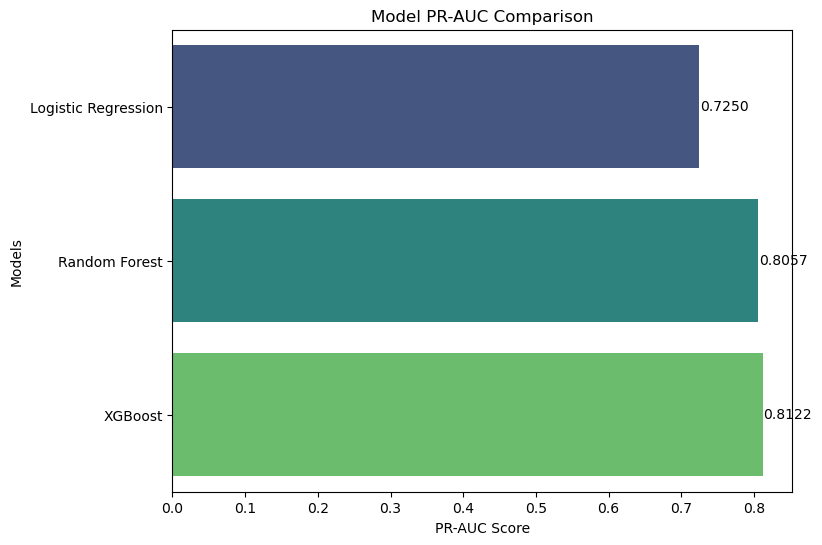

In [97]:
# simple horizontal plot of all saved models (PRAUC) with different colors (include the values on the bars)
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost']
model_metrics = [logreg_metrics, rf_metrics, xgb_metrics]
prauc_scores = [m['pr_auc'] for m in model_metrics]
plt.figure(figsize=(8, 6))
sns.barplot(x=prauc_scores, y=model_names, palette='viridis')
for i, v in enumerate(prauc_scores):
    plt.text(v + 0.001, i, f"{v:.4f}", color='black', va='center')
plt.title('Model PR-AUC Comparison')
plt.xlabel('PR-AUC Score')
plt.ylabel('Models')
plt.savefig('../imgs/model_pr_auc_comparison.png')
plt.show()

## Evalutaion (Test Set)

In [72]:
# evalute the best xgb model on the test set
y_test_pred = best_xgb.predict(X_test)
y_test_prob = best_xgb.predict_proba(X_test)[:, 1]

test_roc_auc = roc_auc_score(y_test, y_test_prob)
test_pr_auc = average_precision_score(y_test, y_test_prob)

# store test metrics
test_metrics = {
    'roc_auc': round(test_roc_auc, 4),
    'pr_auc': round(test_pr_auc, 4),
    'precision': round(precision_score(y_test, y_test_pred), 4),
    'recall': round(recall_score(y_test, y_test_pred), 4)
}


print(f"Test ROC-AUC: {test_roc_auc:.4f}")
print(f"Test PR-AUC: {test_pr_auc:.4f}")
print("\nXGB Test Classification Report:")
print(classification_report(y_test, y_test_pred, digits=4))

Test ROC-AUC: 0.9786
Test PR-AUC: 0.8647

XGB Test Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     56864
           1     0.8367    0.8367    0.8367        98

    accuracy                         0.9994     56962
   macro avg     0.9182    0.9182    0.9182     56962
weighted avg     0.9994    0.9994    0.9994     56962



XGBoost performs EXCELLENTLY on the test set, showing that it infact learnt well and DID NOT overfit

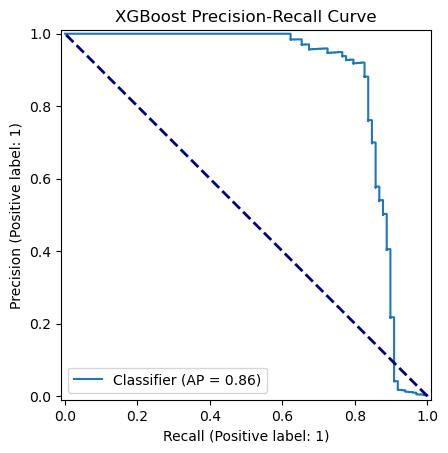

In [98]:
# pr-auc curve
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_predictions(y_test, y_test_prob)
plt.plot([1, 0], [0, 1], color="navy", lw=2, linestyle="--")
plt.title('XGBoost Precision-Recall Curve')
plt.show()

## Save Metrics/hyperparams

In [94]:
# create data frame with columns: model, roc_auc, pr_auc, precision, recall and parameters
import json

results = []
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
model_params = [logreg_params, rf_params, xgb_params]
for i, model in enumerate(models):
    metrics = model_metrics[i]
    params = model_params[i]
    results.append({
        'model': model,
        'roc_auc': metrics['roc_auc'],
        'pr_auc': metrics['pr_auc'],
        'precision': metrics['precision'],
        'recall': metrics['recall'],
        'parameters': ", ".join([f"{key}: {value}" for key, value in params.items()])
    })

# convert to dataframe and save as csv
results_df = pd.DataFrame(results)
results_df.to_csv('../reports/model_comparison_results.csv', index=False)

In [95]:
# save the best xgb model's hyperparams to config.py
xgb_params

{'subsample': 0.6,
 'n_estimators': 300,
 'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 2,
 'colsample_bytree': 1.0}